In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.src.common.enums.enum import (
    MapLayerType,
    ObjectSize,
    GateType,
    TemplateTypes,
    ObjectRotation,
    YamlReplacementKeywords,
    CheckPlacementReturnTypes,
)

from aoe2mapgenerator.src.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.src.common.constants.constants import (
    DEFAULT_EMPTY_VALUE,
    BASE_SCENE_DIR_LINUX,
    BASE_SCENARIO_NAME,
    TEMPLATE_DIR_LINUX,
)
from aoe2mapgenerator.src.common.constants.default_objects import (
    GHOST_OBJECT_DISPLACEMENT,
)
from aoe2mapgenerator.src.common.enums.enum import GateType
import multiprocessing as mp
from aoe2mapgenerator.src.map.map import Map
import os
from aoe2mapgenerator.src.triggers.triggers import TriggerManager
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.src.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.src.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.src.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.src.units.placers.point_management.point_manager import (
    PointCollection,
)
from aoe2mapgenerator.src.testing import awesome_function
from aoe2mapgenerator.src.map.map_object import MapObject
from aoe2mapgenerator.src.units.placers.point_management.point_selector import (
    PointSelector,
)
from aoe2mapgenerator.src.visualizer.visualizer import Visualizer
from aoe2mapgenerator.src.units.placers.gate_placer import GatePlacer
from aoe2mapgenerator.src.units.placers.wall_placer import WallPlacer
from aoe2mapgenerator.src.map.map_manager import MapManager
from aoe2mapgenerator.src.units.placers.placer_configs import *
from aoe2mapgenerator.src.units.placers.placer_configs import PlaceGroupsConfig
import dataclasses
import json

In [2]:
n = 100
map_manager = MapManager(n)

In [3]:
map_manager.point_manager.add_point_collection("base_points")
map_manager.point_manager.get_point_collection("base_points").add_points(
    [(i, j) for i in range(n) for j in range(n)]
)

In [4]:
zones: list[MapObject] = map_manager.place_voronoi_zones(
    VoronoiGeneratorConfig(
        point_collection=map_manager.point_manager.get_point_collection("base_points"),
        interpoint_distance=15,
        map_layer_type=MapLayerType.TERRAIN,
    )
)

In [5]:
terrains = [
    TerrainId.ICE,
    TerrainId.SNOW_STRONG,
    TerrainId.DESERT_CRACKED,
    TerrainId.FOREST_PINE,
    TerrainId.FOREST_AUTUMN,
]

In [6]:
for zone in zones:
    collection_name = "terrains" + str(zone)

    map_manager.point_manager.add_point_collection(collection_name)
    points = map_manager.point_manager.point_selector.get_points_from_map_layer(
        PointSelectorConfig(MapLayerType.TERRAIN, zone)
    )

    map_manager.point_manager.get_point_collection(collection_name).add_points(points)
    terrain = random.choice(terrains)

    config = PlaceGroupsConfig(
        point_collection=map_manager.point_manager.get_point_collection(
            collection_name
        ),
        map_layer_type=MapLayerType.TERRAIN,
        object_type=terrain,
        player_id=PlayerId.GAIA,
        group_size=150,
        groups=10,
        clumping=15,
    )

    map_manager.place_groups(config)

In [7]:
zones = map_manager.place_voronoi_zones(
    VoronoiGeneratorConfig(
        point_collection=map_manager.point_manager.get_point_collection("base_points"),
        interpoint_distance=50,
        map_layer_type=MapLayerType.UNIT,
    )
)

map_manager.point_manager.get_point_collection("base_points").clear()
points = map_manager.get_points_from_map_layer(
    PointSelectorConfig(
        map_layer_type=MapLayerType.TERRAIN,
        object_type=MapObject(TerrainId.ICE, PlayerId.GAIA),
    )
)

map_manager.point_manager.get_point_collection("base_points").add_points(points)

map_manager.place_borders(
    AddBordersConfig(
        point_collection=map_manager.point_manager.get_point_collection("base_points"),
        map_layer_type=MapLayerType.UNIT,
        obj_type=BuildingInfo.CITY_WALL,
        player_id=PlayerId.ONE,
        margin=1,
    )
)

In [8]:
map_manager.point_manager.get_point_collection("base_points").clear()
points = map_manager.get_points_from_map_layer(
    PointSelectorConfig(
        map_layer_type=MapLayerType.UNIT,
        object_type=MapObject(BuildingInfo.CITY_WALL, PlayerId.ONE),
    )
)

map_manager.point_manager.get_point_collection("base_points").add_points(points)

gate_placer = GatePlacer(aoe2_map=map_manager.get_map())

gate_placer.place_gate_on_four_sides(
    point_collection=map_manager.point_manager.get_point_collection("base_points"),
    map_layer_type=MapLayerType.UNIT,
    gate_type=GateType.CITY_GATE,
    player_id=PlayerId.ONE,
)

In [9]:
# map_manager.place_groups(PlaceGroupsConfig(
#     point_manager=point_manager,
#     map_layer_type=MapLayerType.UNIT,
#     object_type=UnitInfo.LEGIONARY,
#     player_id=PlayerId.ONE,
#     group_size=150,
#     groups=10,
#     clumping=15
#     ))

In [10]:
# n = 200
# map_manager = MapManager(n)

# point_manager = PointManager()
# point_manager.add_points([(i, j) for i in range(n) for j in range(n)])

# groups = 10
# group_size = 10
# total = groups * group_size

# configuration = PlaceGroupsConfig(anchor
#     player_id=PlayerId.ONE,
#     groups=groups,
#     group_size=group_size,
#     clumping=10
# )
# map_manager.place_groups(configuration)

# values = map_manager.get_set_with_map_object(
#     map_layer_type=MapLayerType.UNIT,
#     obj=MapObject(UnitInfo.ALFRED_THE_ALPACA, PlayerId.ONE),
# )

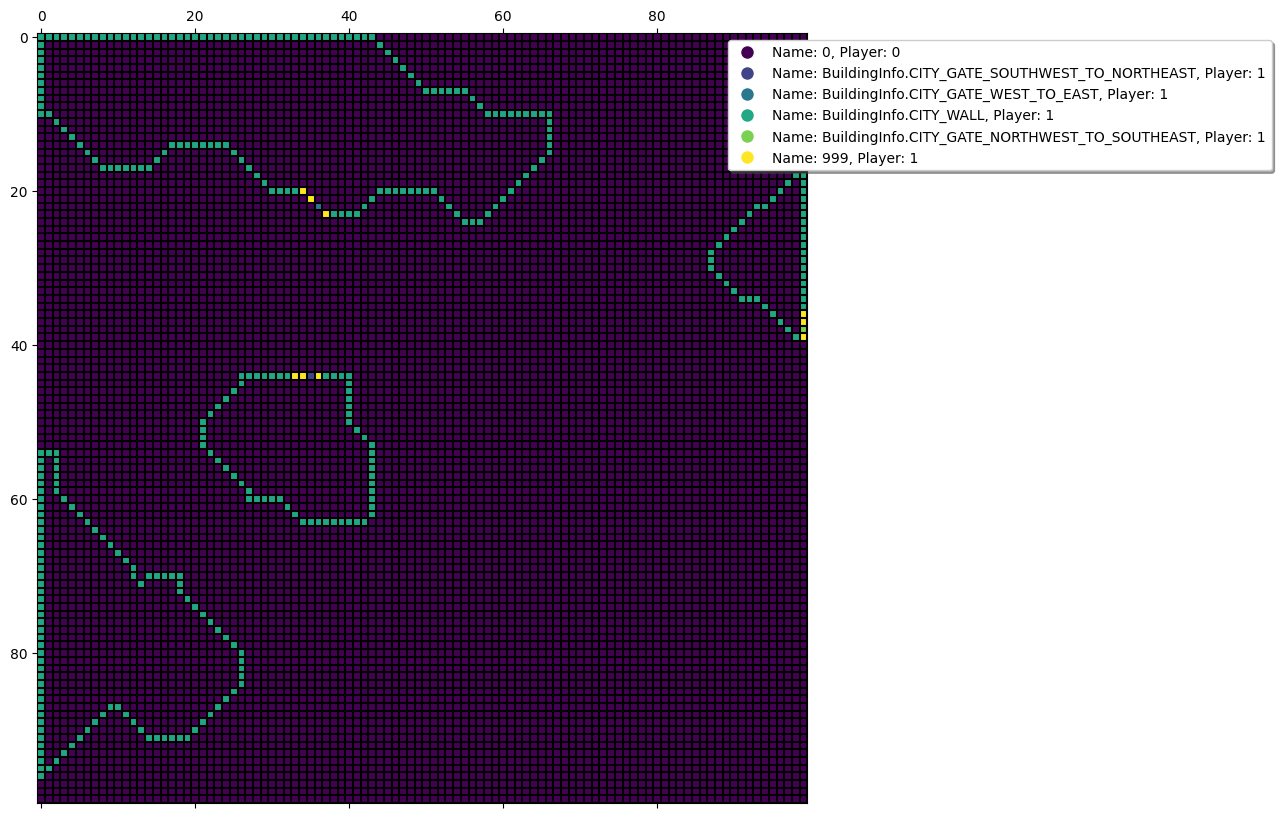

In [11]:
map_manager.visualize_map(
    VisualizeMapConfig(
        map_layer_type=MapLayerType.UNIT,
        fig_size=(10, 10),
        include_legend=True,
        anchor=(1.25, 1),
        transpose=True,
    )
)

In [12]:
scen = Scenario(aoe2_map=map_manager.get_map())


[22:12:39] Reading file: '/home/joseph/.steam/steam/steamapps/compatdata/813780/pfx/dosdevices/c:/users/steamuser/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario/BASE_SCENARIO.aoe2scenario'
[22:12:39] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.53
>>> Scenario variant: 'Age of Empires 2'
##########################################

[22:12:39] Loading scenario structure finished successfully.
[22:12:39] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[22:12:41] Parsing scenario file finished successfully.

[22:12:41] Setting up managers ...

In [13]:
scen.write_map()

In [14]:
scen.save_file(os.path.join(BASE_SCENE_DIR_LINUX, "test_scenarionew.aoe2scenario"))


[22:12:47] Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
[22:12:48] Reconstruction finished successfully.

[22:12:48] File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
[22:12:48] File writing finished successfully.
[22:12:48] File successfully written to: '/home/joseph/.steam/steam/steamapps/compatdata/813780/pfx/dosdevices/c:/users/steamuser/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario/test_scenarionew.aoe2scenario'
[22:12:4

In [52]:
points = point_selector.get_points_from_map_layer(
    PointSelectorConfig(map_layer_type=MapLayerType.UNIT, object_type=zones[-15])
)
point_manager.clear()
point_manager.add_points(points)
zones_2 = map_manager.place_voronoi_zones(
    VoronoiGeneratorConfig(
        point_manager=point_manager,
        interpoint_distance=4,
        map_layer_type=MapLayerType.UNIT,
    )
)
points = point_selector.get_points_from_map_layer(
    PointSelectorConfig(map_layer_type=MapLayerType.UNIT, object_type=zones[-16])
)
point_manager.clear()
point_manager.add_points(points)
map_manager.place_borders(
    AddBordersConfig(
        point_manager=point_manager,
        map_layer_type=MapLayerType.UNIT,
        obj_type=BuildingInfo.CITY_WALL,
        margin=5,
    )
)

IndexError: list index out of range